<파이썬 머신러닝 완벽가이드 개정 2판> 9장 p.584-601

# CHAPTER 09. 추천 시스템 (Recommendations)
#### 09-01. 추천 시스템의 개요와 배경
#### 09-02. 콘텐츠 기반 필터링 추천 시스템
#### 09-03. 최근접 이웃 협업 필터링
#### 09-04. 잠재 요인 협업 필터링

#### 09-01. 추천 시스템의 개요와 배경


- 데이터 기반의 추천 시스템

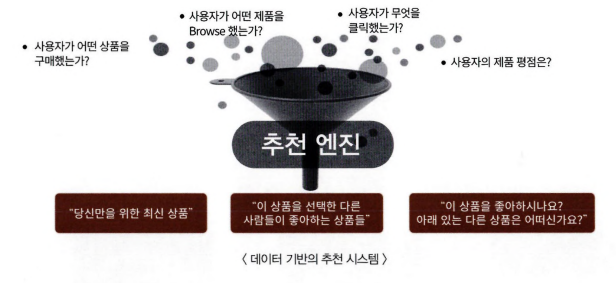

- 추천 시스템의 유형
   1. 콘텐츠 기반 필터링 (Content based filtering)
   2. 협업 필터링 (Collaborative filtering)
      - 최근접 이웃 (Nearest Neighbor) 협업 필터링

         (eg.) Amazon
      - 잠재 요인 (Latent Factor) 협업 필터링
      
         (eg.) Netflix: 행렬 분해(Matrix Factorization)

#### 09-02. 콘텐츠 기반 필터링 추천 시스템


: 특정 아이템을 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천

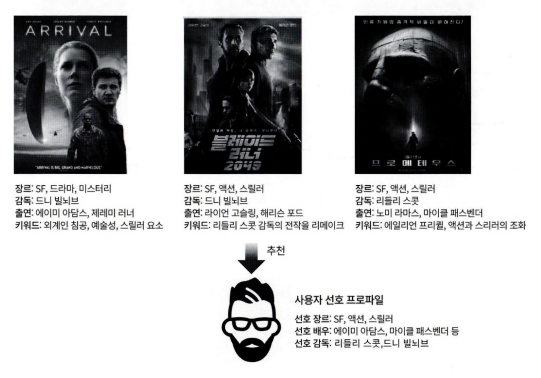

#### 09-03. 최근접 이웃 협업 필터링


- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과
같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것

- 사용자가 평가한 다른 아이템을 기반으로 사용자가 평가하지 않은 아이템의 예측 평가를 도출하는 방식
- "사용자 - 아이템 평점 행렬" 데이터에만 의지
   - 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성


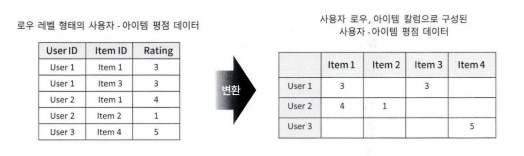

-  메모리(Memory) 협업 필터링
   - 사용자 기반(User—User): Customers like you also bought these items.
      - 특정 사용자와 타 사용자 간의 유사도 (Similarity)를 측정한 뒤 가장 유사도가 높은 Top-N 사용자를 추출해 그들이 선호하는 아이템을 추천
      - 추천 시스템에 사용되는 데이터는 피처 벡터화된 텍스트 데이터와 동일하게 다차원 희소 행렬이라는 특징이 있으므로 유사도 측정을 위해 주로 **코사인 유사도**를 이용
   - 아이템 기반(Item-Item): Customers who bought this item also bought these items.
      -  아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천
   - 비슷한 영화(또는 상품)를 좋아（또는 구입）한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려움.
   
     -> 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음.
   
     -> 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용

#### 09-04. 잠재 요인 협업 필터링

- 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 ‘잠재 요인’을 끄집어내는 것
- 다차원 희소 행렬인 사용자 - 아이템 행렬 데이터를 저차원 밀집 행렬의 사용자 - 잠재요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬(잠재 요인-아이템 행렬)로 분해

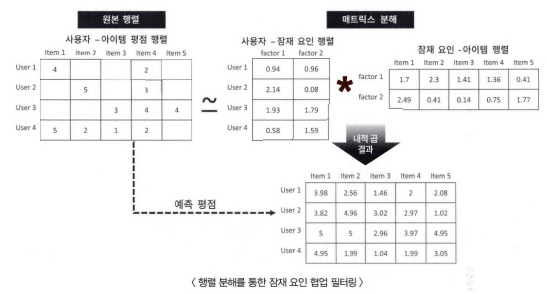

- 평점 = (사용자의 장르별 선호도 벡터) * (영화의 장르별 특성 벡터)

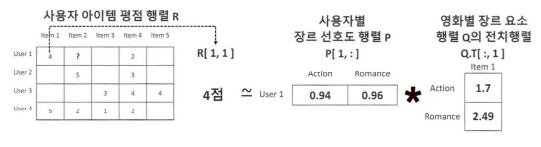

- '잠재 요인'을 기반으로 분해된 매트릭스를 이용해 사용자
가 아직 평가하지 않은 아이템에 대한 예측 평가를 수행

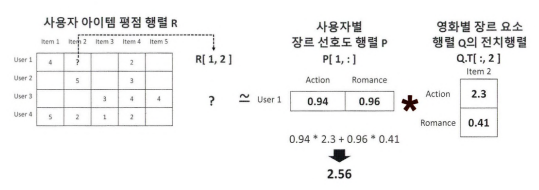

##### **행렬 분해의 이해**

- 행렬 분해 기법 종류
   - SVD (Singular Vector Decomposition) : Null값이 포함되면 행렬 분해 불가능
      - 확률적 경사 하강법 (Stochastic Gradient Descent,
SGD): Null값이 포함된 행렬에 대해 행렬 분해를 수행하는 방법
      - ALS (Alternating Least Squares)
   - NMF(Non—Negative Matrix Factorization)



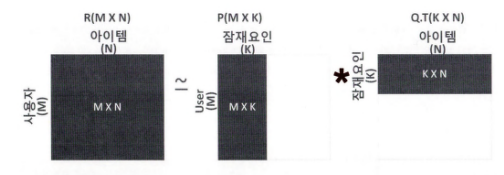

(eg.)

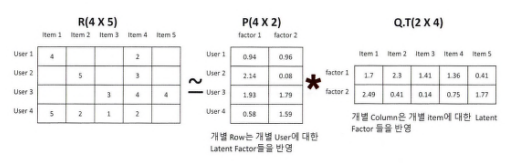

- 사용자-아이템 평점 행렬의 미정 값을 포함한 모든 평점 값은 행렬 분해를 통해 얻어진 P 행렬과 Q.T 행렬의 내적을 통해 예측 평점으로 다시 계산

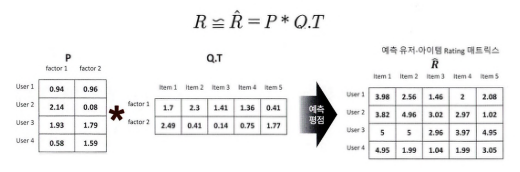

##### **확률적 경사 하강법을 이용한 행렬 분해**

- **P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인
비용 함수 최적화를 통해 P와 Q를 유추해내는 것**
- L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P 행렬과 Q 행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 **예측 R 행렬**을 구함.

- 실제 값과 예측값의 오류 최소화와 L2 규제(Regularization)를 고려한 비용 함수식

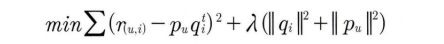

--> 유도된 최적화된 p, q값

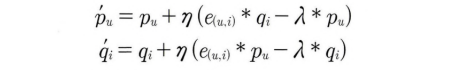

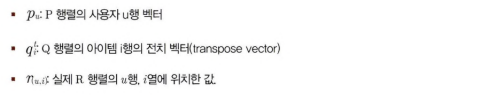

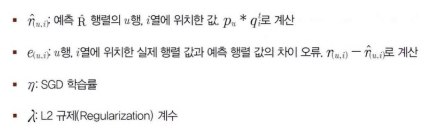

In [7]:
# SGD를 이용해 행렬 분해 수행
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([
    [4, np.nan, np.nan, 2, np.nan],
    [np.nan, 5, np.nan, 3, 1],
    [np.nan, np.nan, 3, 4, 4],
    [5, 2, 1, 2, np.nan]])

num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [8]:
# 실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse( ) 함수
# 실제 R 행렬의 널이 아닌 행렬 값의 위치 인덱스를 추출해
# 이 인덱스에 있는 실제 R 행렬 값과 분해된 P, Q를 이용해 다시 조합된 예측 행렬 값의 RMSE 값을 반환
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
    error=0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [9]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

# steps: SGD를 반복해서 업데이트할 횟수
steps = 1000
# learning_rate: SGD의 학습률
learning_rate = 0.01
# r_lambda: L2 Regularization 계수
r_lambda = 0.01

# SGD 기법으로 우와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i,j,r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i,:], Q[j,:].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate * (eij * Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate * (eij * P[i,:] - r_lambda*Q[j,:])

        rmse = get_rmse(R,P,Q,non_zeros)
        if (step % 50) == 0:
            print("### iteration step:", step, "rmse:", rmse)

### iteration step: 0 rmse: 3.261355059488935
### iteration step: 0 rmse: 3.26040057174686
### iteration step: 0 rmse: 3.253984404542389
### iteration step: 0 rmse: 3.2521583839863624
### iteration step: 0 rmse: 3.252335303789125
### iteration step: 0 rmse: 3.251072196430487
### iteration step: 0 rmse: 3.2492449982564864
### iteration step: 0 rmse: 3.247416477570409
### iteration step: 0 rmse: 3.241926055455223
### iteration step: 0 rmse: 3.2400454107613084
### iteration step: 0 rmse: 3.240166740749792
### iteration step: 0 rmse: 3.2388050277987723
### iteration step: 50 rmse: 0.5003190892212748
### iteration step: 50 rmse: 0.5001616291326989
### iteration step: 50 rmse: 0.49899601202578087
### iteration step: 50 rmse: 0.4988483450145831
### iteration step: 50 rmse: 0.49895189256631756
### iteration step: 50 rmse: 0.49833236830090993
### iteration step: 50 rmse: 0.4984148489378701
### iteration step: 50 rmse: 0.49792599580240876
### iteration step: 50 rmse: 0.4900605568692785
### itera

In [10]:
# 분해된 P와 Q 함수를 P*Q.T로 예측 행렬을 만들어서 출력
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


- 원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않으며, 널인 값은 새로운 예측값으로 채워짐.